In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

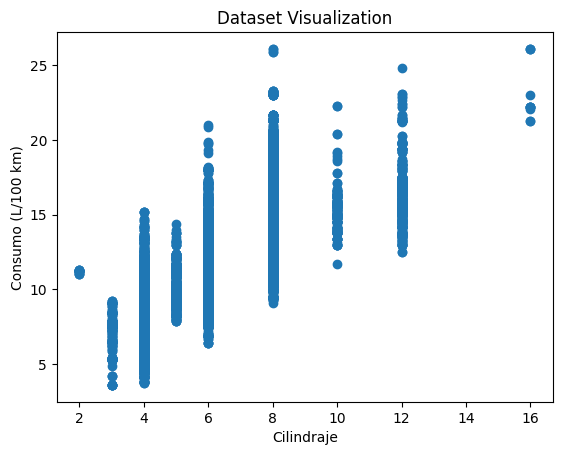

In [54]:
data = pd.read_csv('consumo_gasolina.csv')
X = data[['CYLINDERS']].values 
Y = data['COMB (L/100 km)'].values  

# Visualize dataset
plt.scatter(X, Y)
plt.xlabel('Cilindraje')
plt.ylabel('Consumo (L/100 km)')
plt.title('Dataset Visualization')
plt.show()


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)
X_train.shape, X_test.shape 


((18044, 1), (4512, 1))

In [56]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [57]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R^2 Score: 0.5842
Mean Squared Error (MSE): 3.5238
Mean Absolute Error (MAE): 1.3964


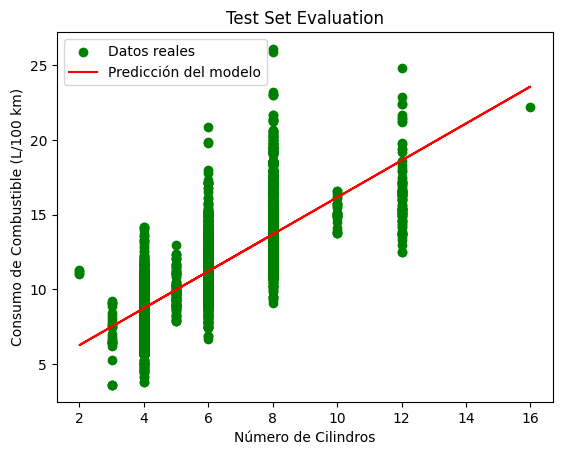

In [58]:

Y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)


plt.scatter(X_test, Y_test, color='green', label='Datos reales')
plt.plot(X_test, Y_pred_test, color='red', label='Predicción del modelo')
plt.title('Test Set Evaluation')
plt.xlabel('Número de Cilindros')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.legend()
plt.show()


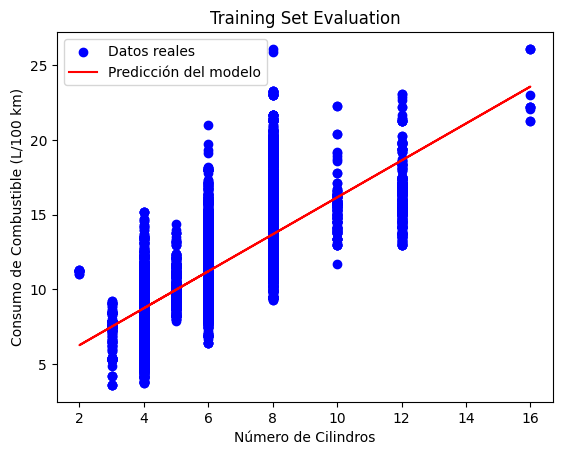

In [59]:
Y_pred_train = model.predict(X_train)

plt.scatter(X_train, Y_train, color='blue', label='Datos reales')
plt.plot(X_train, Y_pred_train, color='red', label='Predicción del modelo')
plt.title('Training Set Evaluation')
plt.xlabel('Número de Cilindros')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.legend()
plt.show()



In [60]:

w = 0
b = 0
learning_rate = 0.01
epochs = 100
mse_history = []
mae_history = []



In [61]:
for epoch in range(epochs):
    Y_pred = np.dot(X_train, w) + b
    residuals = Y_train - Y_pred
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    mse_history.append(mse)
    mae_history.append(mae)
    w_gradient = -2 * np.dot(X_train.T, residuals) / len(X_train)
    b_gradient = -2 * np.sum(residuals) / len(X_train)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient


KeyboardInterrupt: 

In [ ]:

plt.plot(mse_history)
plt.title('Loss over Time (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(mae_history)
plt.title('Loss over Time (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
w = 0
b = 0
learning_rate = 0.01
epochs = 100
r2_history = []

for epoch in range(epochs):
    Y_pred = np.dot(X_train, w) + b
    r2 = r2_score(Y_train, Y_pred)
    r2_history.append(r2)
    residuals = Y_train - Y_pred
    w_gradient = -2 * np.dot(X_train.T, residuals) / len(X_train)
    b_gradient = -2 * np.sum(residuals) / len(X_train)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

plt.plot(r2_history)
plt.title('R² Over Time')
plt.xlabel('Epochs')
plt.ylabel('R²')
plt.show()

ValueError: y_true and y_pred have different number of output (1!=18044)

In [63]:

print("Coeficiente (Pendiente): {:.4f}".format(model.coef_[0]))
print("Intercepto (b): {:.4f}".format(model.intercept_))  


average_consumption = data['COMB (L/100 km)'].mean()
print("Promedio del consumo de combustible: {:.4f}".format(average_consumption))



Coeficiente (Pendiente): 1.2367
Intercepto (b): 3.7899
Promedio del consumo de combustible: 11.0343
